# School Zone

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [78]:
# load data with a different encoding
school = pd.read_csv('../data/landing/dv346-schoollocations2023.csv', encoding='ISO-8859-1')

In [79]:
# check the first 5 rows
school.head(5)

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.66660,-38.61771
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.59039,-38.38628
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.47565,-37.08450
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.23472,-36.90137
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.21398,-37.74268


In [80]:
# Get attribute names
school.columns

Index(['Education_Sector', 'Entity_Type', 'School_No', 'School_Name',
       'School_Type', 'School_Status', 'Address_Line_1', 'Address_Line_2',
       'Address_Town', 'Address_State', 'Address_Postcode',
       'Postal_Address_Line_1', 'Postal_Address_Line_2', 'Postal_Town',
       'Postal_State', 'Postal_Postcode', 'Full_Phone_No', 'LGA_ID',
       'LGA_Name', 'X', 'Y'],
      dtype='object')

In [81]:
# Drop the columns from attribute names
school.drop(columns=['Entity_Type','School_Name', 'School_Status', 'Address_Line_1', 'Address_Line_2', 'Postal_Address_Line_1', 'Postal_Address_Line_2',
                     'Address_State',
                     'Postal_Town', 'Postal_State', 'Postal_Postcode', 
                     'Full_Phone_No', 'LGA_ID', 'LGA_Name'], axis=1, inplace=True)

In [82]:
# create a list of melbourne postcodes
melbourne_postcodes = [
    3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 
    3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 
    3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 
    3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 
    3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 
    3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 
    3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 
    3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 
    3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 
    3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 
    3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 
    3201, 3202, 3203, 3204, 3205, 3206, 3207, 3800, 3801
]


In [83]:
# Only retain the schools in Melbourne Metropolitan
school = school[school['Address_Postcode'].isin(melbourne_postcodes)]

In [84]:
# Check the first 5 rows
school.head(10)

,Education_Sector,School_No,School_Type,Address_Town,Address_Postcode,X,Y
4,Government,12,Primary,Warrandyte,3113,145.21398,-37.74268
11,Government,84,Primary,Cheltenham,3192,145.05463,-37.96861
13,Government,113,Primary,Newport,3015,144.87834,-37.83842
23,Government,197,Primary,Doncaster,3108,145.12967,-37.78680
25,Government,209,Primary,Eltham,3095,145.14780,-37.72498
29,Government,250,Primary,Flemington,3031,144.93392,-37.78067
30,Government,253,Primary,Footscray,3011,144.89267,-37.79838
32,Government,267,Primary,Sandringham,3191,145.00947,-37.94704
35,Government,293,Primary,Hawthorn,3122,145.01838,-37.82011
36,Government,294,Primary,Heidelberg,3084,145.06780,-37.75470


## Exploratory Data Analysis (EDA)

In [85]:
# check the rows with null values
school.isnull().sum()

Education_Sector    0
School_No           0
School_Type         0
Address_Town        0
Address_Postcode    0
X                   0
Y                   0
dtype: int64

In [86]:
# check percentage of categorical values in education sector 
school['Education_Sector'].value_counts(normalize=True) * 100

Education_Sector
Government     63.339552
Catholic       24.626866
Independent    12.033582
Name: proportion, dtype: float64

In [87]:
# check percentage of categorical values in school type
school['School_Type'].value_counts(normalize=True) * 100

School_Type
Primary      64.179104
Secondary    17.723881
Pri/Sec      11.194030
Special       6.529851
Language      0.373134
Name: proportion, dtype: float64

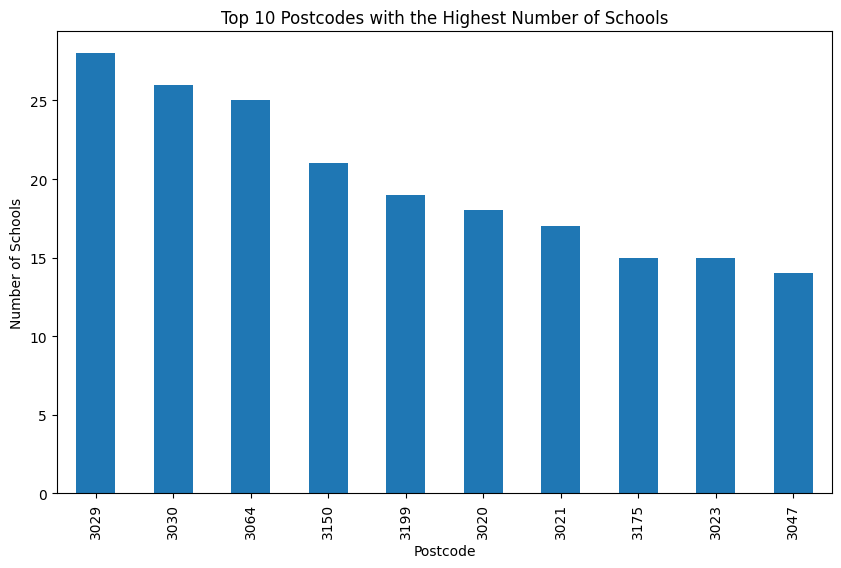

In [88]:
# Plot top 10 postcodes with the highest number of Schools
plt.figure(figsize=(10, 6))
school['Address_Postcode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Postcodes with the Highest Number of Schools')
plt.xlabel('Postcode')
plt.ylabel('Number of Schools')
plt.show()

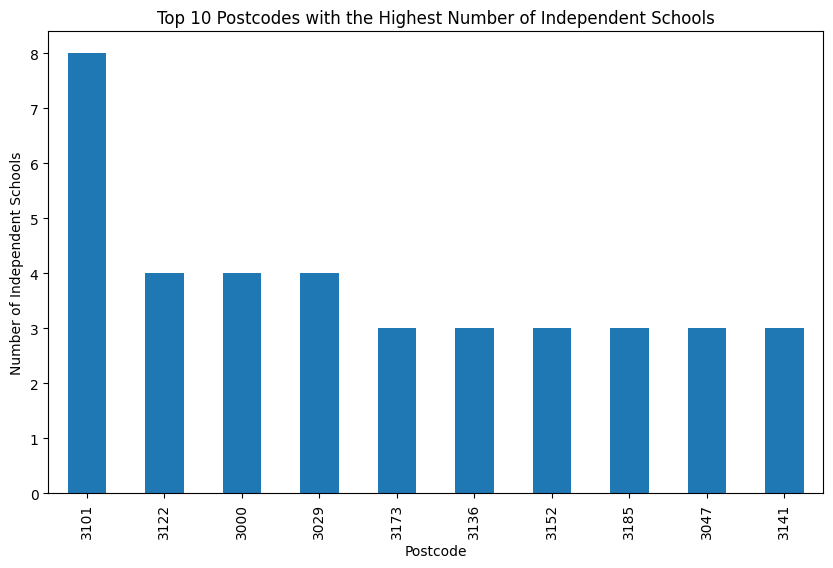

In [74]:
# Plot top 10 postcodes with the highest number of independent schools in education sector
plt.figure(figsize=(10, 6))
school[school['Education_Sector'] == 'Independent']['Address_Postcode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Postcodes with the Highest Number of Independent Schools')
plt.xlabel('Postcode')
plt.ylabel('Number of Independent Schools')
plt.show()

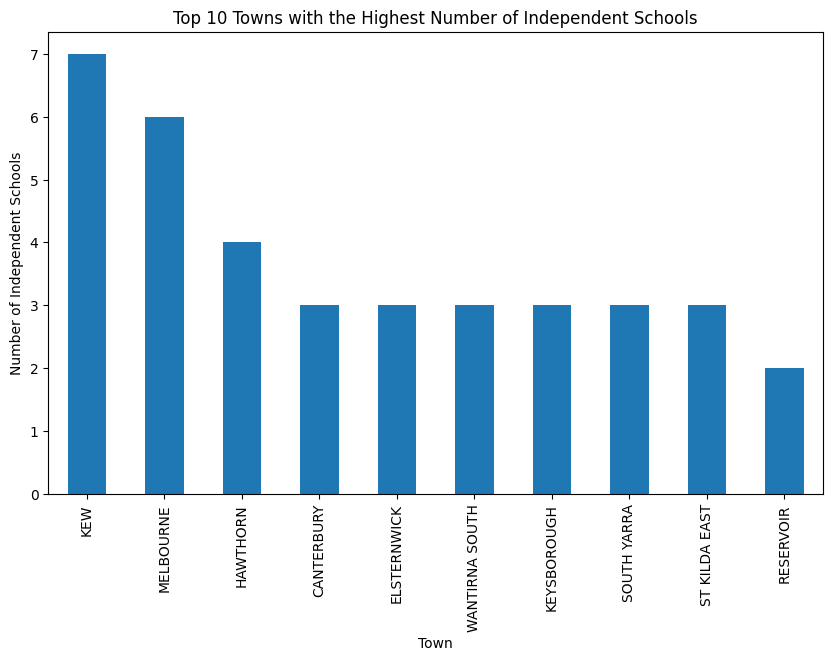

In [89]:
# Top 10 towns with the highest number of independent schools in education sector
plt.figure(figsize=(10, 6))
school[school['Education_Sector'] == 'Independent']['Address_Town'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Towns with the Highest Number of Independent Schools')
plt.xlabel('Town')
plt.ylabel('Number of Independent Schools')
plt.show()